<a href="https://colab.research.google.com/github/NophaieViscente/colab/blob/main/Analisando_Dados_da_Educa%C3%A7%C3%A3o_Mesorregi%C3%A3o_Serrana_%7C_Microrregi%C3%A3o_de_Curitibanos_SC_%7C_Anos_2015_a_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importando as bibliotecas 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando os dados do ENEM já filtrado por estado.
dadosSC = pd.read_csv('/content/drive/MyDrive/microdados_enem_sc_2015_2019.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (82,84,142,143,144,158,159,160,161,162,163,164,165,166) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
# Conferindo as propriedades os datasets. 
dadosSC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700300 entries, 0 to 700299
Columns: 169 entries, Unnamed: 0 to IN_TEMPO_ADICIONAL
dtypes: float64(51), int64(63), object(55)
memory usage: 902.9+ MB


In [4]:
# Criando função para implementar gráficos de linha . 
def GraficoLinha (tamanhoFigura,dados,x,y,hueAdicional,estilo_Erro,tipoMarcador,larguraLinha,tamanhoMarcador,titulo,
                  legenda,posicao_legenda,tamanhoLabels,xlabel,ylabel,listaTicks_x,grid) :
  fig, ax = plt.subplots(figsize=tamanhoFigura)
  sns.lineplot(data=dados,x=x,y=y,hue=hueAdicional,err_style=estilo_Erro,marker=tipoMarcador,lw=larguraLinha,
               markersize=tamanhoMarcador)
  for axis in ['top', 'right', 'left']:
    ax.spines[axis].set_color(None)
  plt.title(titulo,fontdict={'fontsize':20,'fontweight':'semibold'})
  leg = plt.legend(legenda,bbox_to_anchor=(posicao_legenda))
  plt.tick_params(labelsize=tamanhoLabels)
  plt.ylabel(ylabel=ylabel,fontdict={'fontsize':15})
  plt.xlabel(xlabel=xlabel,fontdict={'fontsize':15})
  plt.xticks(listaTicks_x)
  plt.grid(grid)
  plt.show()

In [5]:
dados_regiao_serrana = pd.read_csv('/content/drive/MyDrive/microdados_enem_microrregiao_curitibanosSC_2015_2019.csv')

In [6]:
#Capturando os dados das notas das provas e colocando em uma variável chamada provas
provas = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_MT','NU_NOTA_LC','NU_NOTA_REDACAO']
# Atribuindo a soma das notas das provas de cada candidato da amostra e adicionando mais uma coluna ao dataframe 
# 'dadosSC' com a nota total de cada candidato.
dadosSC['NU_NOTA_TOTAL'] = dadosSC[provas].sum(axis=1)
# Alocando em um novo dataset sem as notas zero 
dadosSC_sem_nota_zero = dadosSC.query('NU_NOTA_TOTAL > 0')

In [7]:
# Verificando a média de notas totais por declaração de raça dos participantes
# onde pode se observar que há uma declaração de raça a mais que as 5 normais
dadosSC_sem_nota_zero['NU_NOTA_TOTAL'].groupby(dadosSC_sem_nota_zero['TP_COR_RACA']).mean()

TP_COR_RACA
0    2582.910852
1    2631.355316
2    2439.285101
3    2495.678540
4    2516.514529
5    2365.593298
6    2536.519490
Name: NU_NOTA_TOTAL, dtype: float64

In [9]:
# Conferindo a quantidade de dados por declaração de raça. 
# Após verificado o dicionário dos dados, validou se que no ano de 2015 havia uma possível
# declaração a mais do que nos outros anos, podia se declarar como 'não declarado/não sabe'
# portanto iremos remover esses dados pois são poucos e não terão relevância para nossa análise. 
dados_regiao_serrana['TP_COR_RACA'].value_counts()

1    7521
3    2216
2     265
0     236
4     173
5      22
6       5
Name: TP_COR_RACA, dtype: int64

In [10]:
# Removendo dados do dataset de 2015 que contém um campo a mais com 5 entradas na coluna 'TP_COR_RACA'
dados_remover2015 = dados_regiao_serrana.loc[dados_regiao_serrana['TP_COR_RACA'] == 6]
dados_regiao_serrana.drop(dados_remover2015.index,inplace=True)

In [12]:
# Conferindo se foram removidas as linhas que continham esses dados .
dados_regiao_serrana['TP_COR_RACA'].value_counts()

1    7521
3    2216
2     265
0     236
4     173
5      22
Name: TP_COR_RACA, dtype: int64

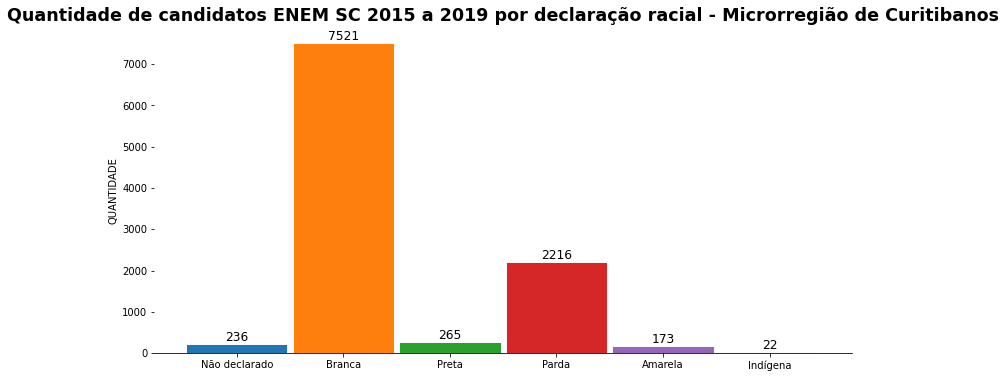

In [13]:
# Filtrando os candidatos por declaração de raça.
participantes_por_Raca = dados_regiao_serrana['TP_COR_RACA'].value_counts().sort_index()
# Criando dicionário para a substituição dos números pela categoria . 
dicionarioRacas = {0 : 'Não declarado', 1 : 'Branca',2 : 'Preta', 3 :'Parda',4:'Amarela',5:'Indígena'}
# Construindo o gráfico
fig, ax = plt.subplots(figsize=(12.5,6))
# Retirando as linhas de borda . 
for axis in ['top', 'right', 'left']:
   ax.spines[axis].set_color(None)
# Capturando o indice para ser substituído por uma categoria;
# Capturando valor para alocar em cima das barras do gráfico.
for indice, valor in enumerate(participantes_por_Raca) :
  indice = dicionarioRacas[indice]
  fig = plt.bar(indice,valor,width=0.95,edgecolor='white',linewidth=0.95)
  ax.text(x=indice ,y=valor, s=valor ,horizontalalignment='center',
          verticalalignment='bottom',fontdict={'fontsize':12.25})
plt.title('Quantidade de candidatos ENEM SC 2015 a 2019 por declaração racial - Microrregião de Curitibanos',
          fontdict={'fontsize': 17.5,'fontweight':'semibold'})
plt.ylabel('QUANTIDADE')
plt.show()

In [14]:
#Capturando os dados das notas das provas e colocando em uma variável chamada provas
provas = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_MT','NU_NOTA_LC','NU_NOTA_REDACAO']
# Atribuindo a soma das notas das provas de cada candidato da amostra e adicionando mais uma coluna ao dataframe 
# 'dados_regiao_serrana' com a nota total de cada candidato.
dados_regiao_serrana['NU_NOTA_TOTAL'] = dados_regiao_serrana[provas].sum(axis=1)
# Alocando em um novo dataset sem as notas zero 
dados_rs_sem_nota_zero = dados_regiao_serrana.query('NU_NOTA_TOTAL > 0')
dados_rs_sem_nota_zero['NU_NOTA_TOTAL'].groupby(dados_rs_sem_nota_zero['TP_COR_RACA']).mean()

TP_COR_RACA
0    2478.693293
1    2544.023141
2    2421.418182
3    2435.174755
4    2565.319531
5    2278.711765
Name: NU_NOTA_TOTAL, dtype: float64

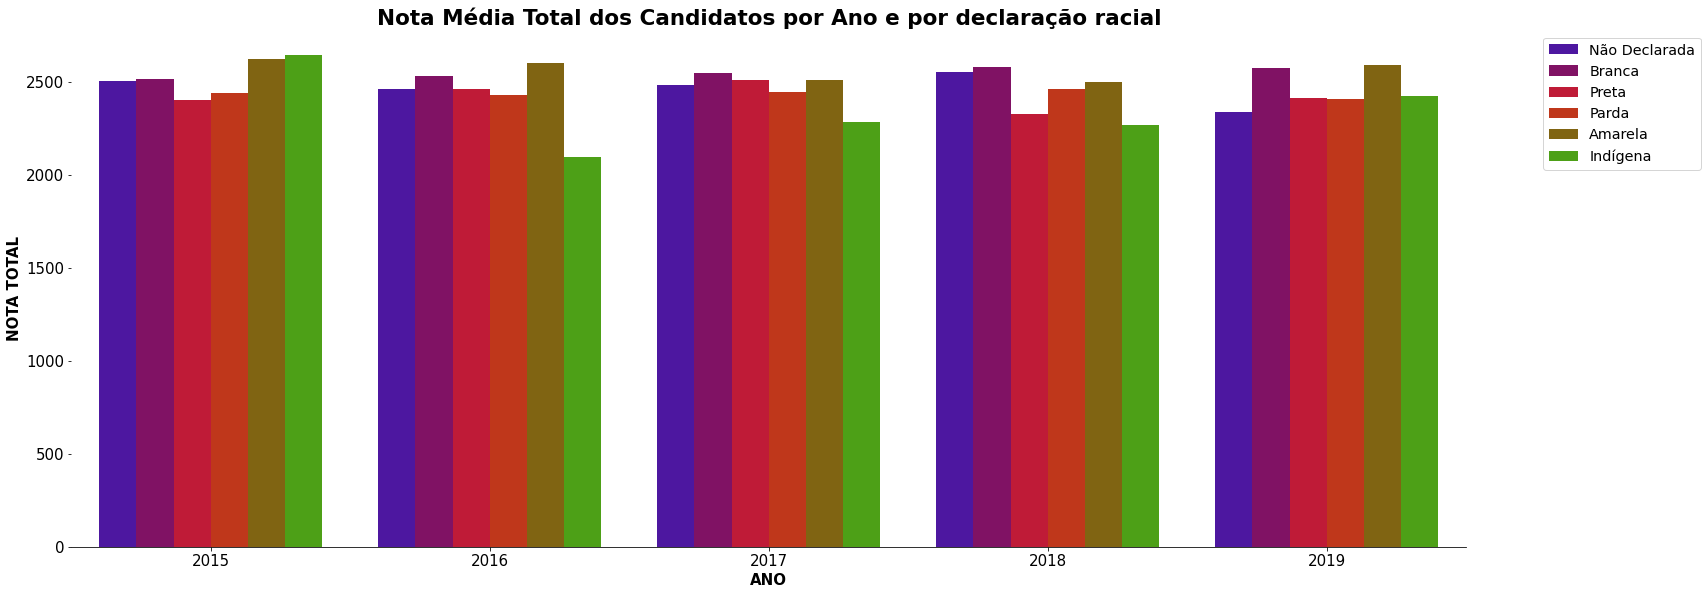

In [15]:
fig, ax = plt.subplots(figsize=(25,9.5))
for axis in ['top', 'right', 'left']:
   ax.spines[axis].set_color(None)
sns.barplot(data=dados_rs_sem_nota_zero,x='NU_ANO',y='NU_NOTA_TOTAL',hue='TP_COR_RACA',palette='brg',ci=None)
leg = plt.legend(['Não Declarada','Branca','Preta','Parda','Amarela','Indígena'],bbox_to_anchor=(1.05,1),
                 fontsize='x-large')
plt.title('Nota Média Total dos Candidatos por Ano e por declaração racial',fontdict={'fontsize':21.5,
                                                                                      'fontweight':'semibold'})
plt.ylabel('NOTA TOTAL',fontdict={'fontsize': 15,'fontweight':'semibold'})
plt.xlabel('ANO',fontdict={'fontsize':15,'fontweight':'semibold'})
for i in range(0,3000,500):
  plt.yticks([i].append(i))
label=['2015','2016','2017','2018','2019']
plt.xticks(ticks=range(0,len(label)),labels=label)
plt.tick_params(labelsize=15)
plt.show()

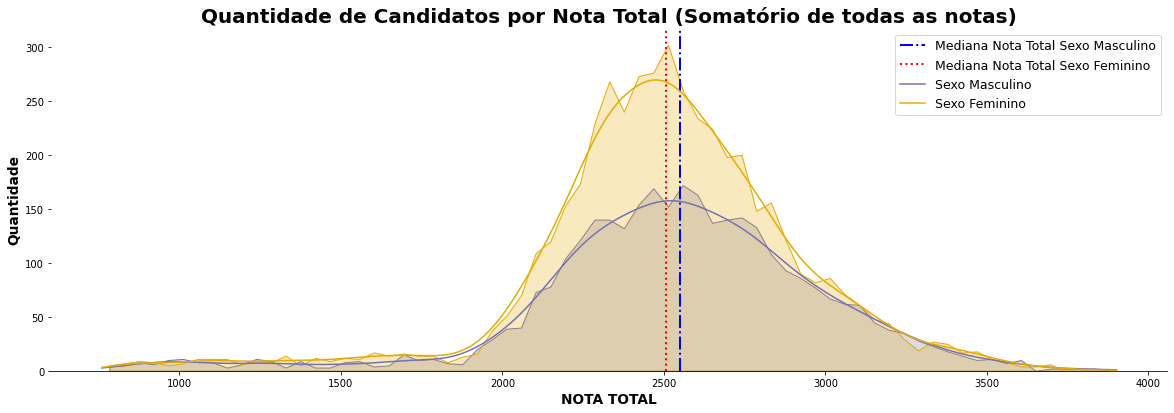

In [16]:
# Criando dicionário para personalizar fontes
dicionarioFonte = {'fontsize':13.7,'weight':'semibold'}
# Gerando a figura e os eixos .
fig , ax = plt.subplots(figsize=(20,6.3))
# Eliminando as bordas do gráfico
for axis in ['top', 'right', 'left']:
   ax.spines[axis].set_color(None)
# Renomeando os 'labels' dos eixos.
plt.xlabel('NOTA TOTAL',fontdict=dicionarioFonte)
plt.ylabel('Quantidade',fontdict=dicionarioFonte)
# Fazendo o cálculo da mediana para traças a linha vertical
mediana_masculino = dados_rs_sem_nota_zero.query('TP_SEXO == "M"')['NU_NOTA_TOTAL'].median()
mediana_feminino = dados_rs_sem_nota_zero.query('TP_SEXO == "F"')['NU_NOTA_TOTAL'].median()
moda_feminino = dados_rs_sem_nota_zero.query('TP_SEXO == "F"')['NU_NOTA_TOTAL'].mode()
moda_masculino = dados_rs_sem_nota_zero.query('TP_SEXO == "M"')['NU_NOTA_TOTAL'].mode()
# Traçando a linha vertical para as medianas .
plt.axvline(mediana_masculino,ls='dashdot',color='blue',lw=2.025)
plt.axvline(mediana_feminino,ls='dotted',color='red',lw=2.025)
# Plotando o gráfico . 
sns.histplot(dados_rs_sem_nota_zero,x = 'NU_NOTA_TOTAL',hue='TP_SEXO',kde=True,element='poly',
             palette='Dark2_r',stat='count')
# Escrevendo a legenda . 
plt.legend(['Mediana Nota Total Sexo Masculino','Mediana Nota Total Sexo Feminino','Sexo Masculino','Sexo Feminino'],
           fontsize=12.5,loc='best')
# Colocando o título no gráfico. 
plt.title('Quantidade de Candidatos por Nota Total (Somatório de todas as notas)',
          fontdict={'fontsize': 20,'fontweight':'semibold'})
plt.show()

In [17]:
dicionarioRenda = {'A':'Classe E', 'B':'Classe E','C':'Classe E',
                  'D':'Classe E','E':'Classe D',
                  'F':'Classe D','G':'Classe D','H':'Classe C',
                  'I':'Classe C','J':'Classe C','K':'Classe C',
                  'L':'Classe C','M':'Classe C','N':'Classe B',
                  'O':'Classe B','P':'Classe B','Q':'Classe A'}
dados_rs_sem_nota_zero['Q006'] = dados_rs_sem_nota_zero['Q006'].replace(dicionarioRenda)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


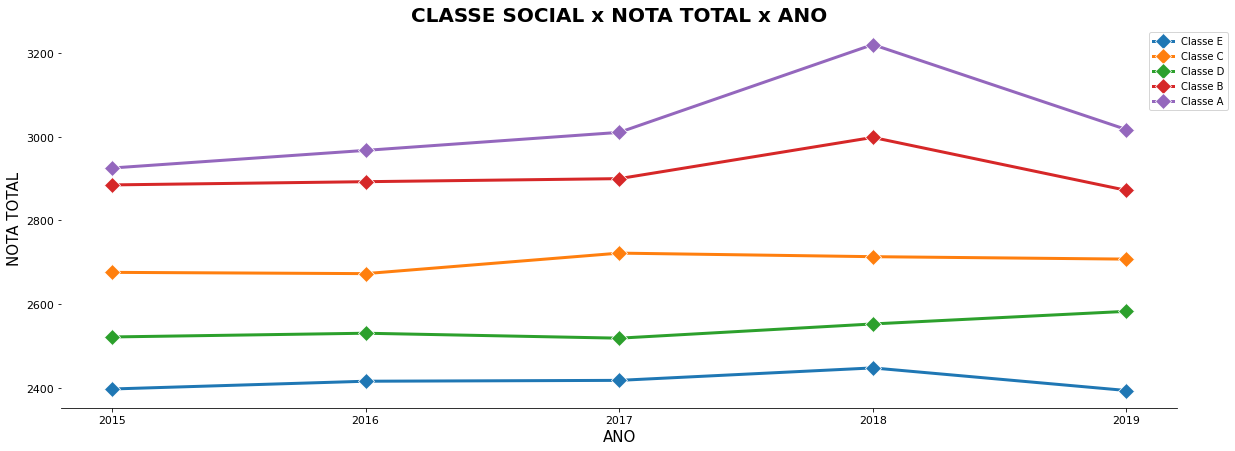

In [18]:
GraficoLinha((20,7),dados_rs_sem_nota_zero,'NU_ANO','NU_NOTA_TOTAL','Q006',None,'D',3,11,'CLASSE SOCIAL x NOTA TOTAL x ANO',
             ['Classe E','Classe C','Classe D','Classe B','Classe A'],(1.05,1),11,'ANO',
             'NOTA TOTAL',[2015,2016,2017,2018,2019],False)

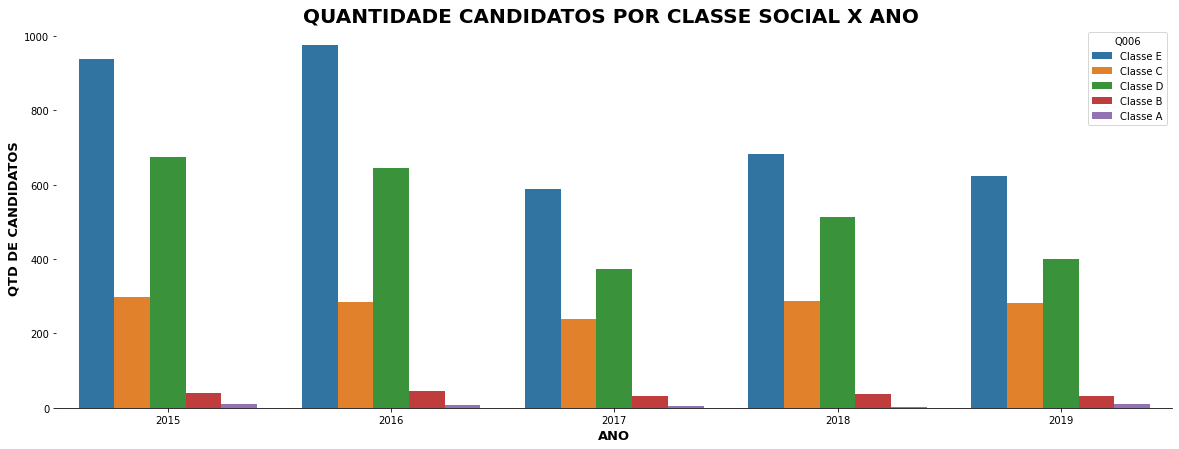

In [19]:
dados_contador = pd.DataFrame()
dados_contador = dados_rs_sem_nota_zero[['NU_ANO','Q006']].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(20,7))
sns.countplot(data=dados_rs_sem_nota_zero,x='NU_ANO',hue='Q006',orient='v')
for axis in ['top','left','right'] : 
  ax.spines[axis].set_color(None)

plt.title('QUANTIDADE CANDIDATOS POR CLASSE SOCIAL X ANO ',fontdict={'fontsize':20,'fontweight':'semibold'})
plt.xlabel('ANO',fontdict={'fontsize':13,'fontweight':'semibold'})
plt.ylabel('QTD DE CANDIDATOS', fontdict={'fontsize':13,'fontweight':'semibold'})
plt.show()

In [20]:
dados_contador

NU_ANO  Q006    
2015    Classe A     10
        Classe B     41
        Classe C    299
        Classe D    674
        Classe E    939
2016    Classe A      8
        Classe B     44
        Classe C    284
        Classe D    646
        Classe E    975
2017    Classe A      6
        Classe B     32
        Classe C    239
        Classe D    374
        Classe E    589
2018    Classe A      2
        Classe B     36
        Classe C    288
        Classe D    514
        Classe E    682
2019    Classe A      9
        Classe B     31
        Classe C    283
        Classe D    399
        Classe E    623
dtype: int64

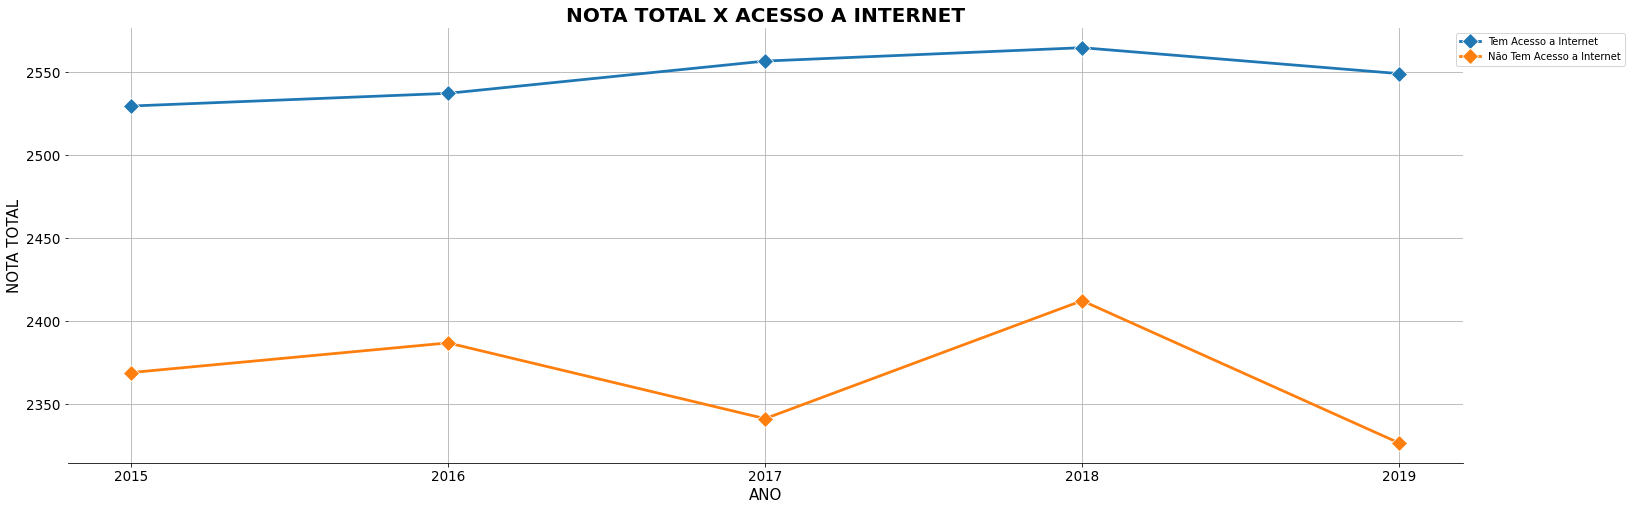

In [ ]:
GraficoLinha((25,8),dados_rs_sem_nota_zero,'NU_ANO','NU_NOTA_TOTAL','Q025',None,'D',2.75,
             11,'NOTA TOTAL X ACESSO A INTERNET',['Tem Acesso a Internet','Não Tem Acesso a Internet'],(1.12,1),13.5,'ANO','NOTA TOTAL',[2015,2016,2017,2018,2019],True)

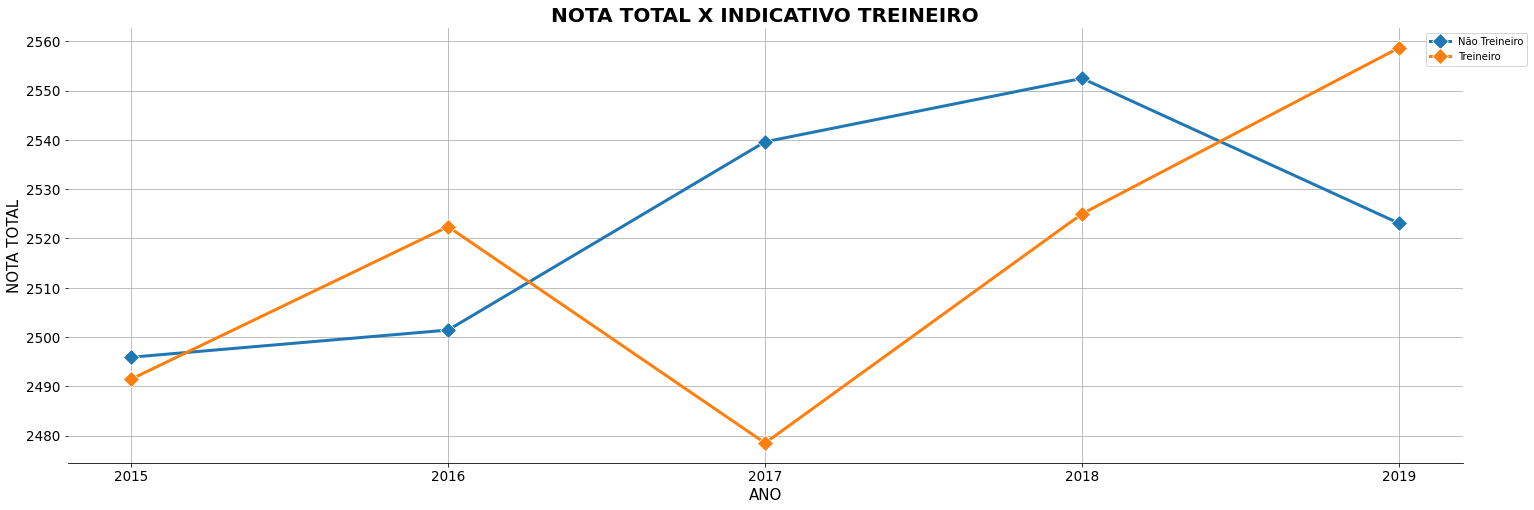

In [22]:
GraficoLinha((25,8),dados_rs_sem_nota_zero,'NU_ANO','NU_NOTA_TOTAL','IN_TREINEIRO',None,'D',3,11,
             'NOTA TOTAL X INDICATIVO TREINEIRO',['Não Treineiro','Treineiro'],(1.05,1),13.5,
             'ANO','NOTA TOTAL',[2015,2016,2017,2018,2019],True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


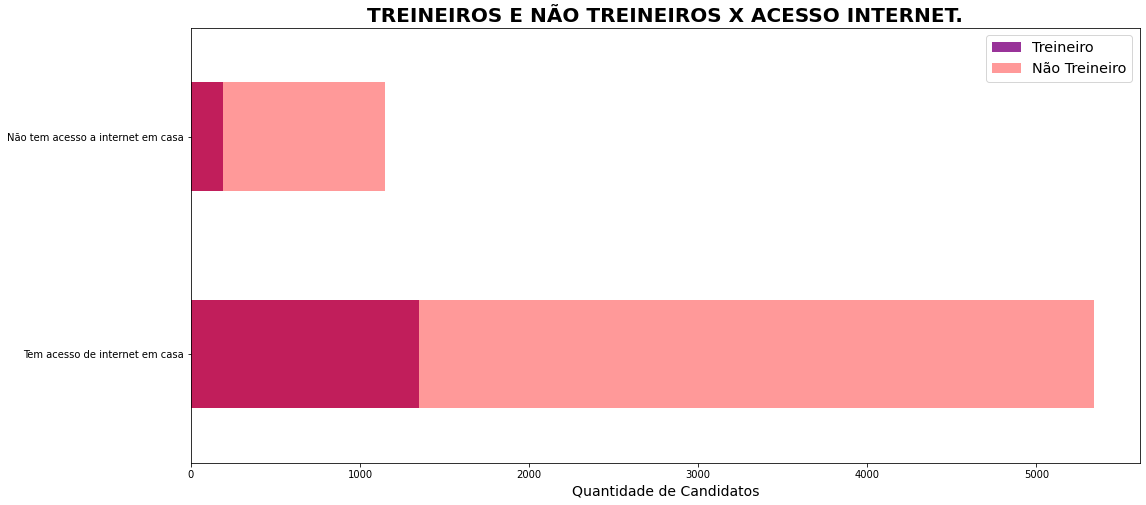

In [23]:
dicionario_acesso_internet = {'A' : 'Não tem acesso a internet em casa','B':'Tem acesso de internet em casa'}
dados_rs_sem_nota_zero['Q025'] = dados_rs_sem_nota_zero['Q025'].replace(dicionario_acesso_internet)
treineiro_renda = dados_rs_sem_nota_zero.query('IN_TREINEIRO == 1')['Q025'].value_counts()
nao_treineiro_renda = dados_rs_sem_nota_zero.query('IN_TREINEIRO == 0')['Q025'].value_counts()
treineiro_renda.plot(kind='barh',color='purple',alpha=.8,figsize=(17,8))
nao_treineiro_renda.plot(kind='barh',color='red',alpha=.4,figsize=(17,8))
plt.legend(['Treineiro','Não Treineiro'],fontsize='x-large')
plt.title('TREINEIROS E NÃO TREINEIROS X ACESSO INTERNET.',fontdict={'fontsize':20,'fontweight':'semibold'})
plt.xlabel('Quantidade de Candidatos',fontdict={'fontsize':14})
plt.show()

In [24]:
# Carregando dados do IBGE para poder usar na análise do ENEM
ibge = pd.read_csv('/content/drive/MyDrive/IBGE.csv',sep=';',encoding='ISO-8859-1')
# Criando lista para filtrar pelos municipios da região serrana, microrregião de Curitibanos
listaMunicipiosIBGE = [4200051, 4202875, 4203600, 4204806, 4205555, 4211058, 4213302,
       4213351, 4215505, 4219150, 4219853, 4216057]
# Verificando o DataFrame do IBGE com todos os dados de SC .
ibge

,MUNICIPIO,CODIGO_MUNICIPIO,GENTILICO,PREFEITO_ATUAL,AREA_TERRITORIAL,POPULACAO,DENSIDADE_DEMO,ESCOLARIZACAO,IDHM,MORTALIDADE_INFANTIL,RECEITAS_REALIZADASx1000,DESPESAS_EMPENHADASx1000,PIB_PER_CAPTA
0,Abdon Batista,4200051,abdonense,JADIR LUIZ DE SOUZA,"237,517",2548,"11,25",100,"0,694","37,04","23228,89256","18399,70671","24517,73"
1,Abelardo Luz,4200101,abelardo-lusense,NERCI SANTIN,"953,992",17960,"17,94","97,1","0,696","21,66","62978,7649","54531,83536","39108,44"
2,Agrolândia,4200200,agrolandense,JOSÉ CONSTANTE,"206,815",11013,"44,92",97,"0,725","18,87","31019,33416","28123,29815","23224,16"
3,Agronômica,4200309,agronomense,CESAR LUIZ CUNHA,"129,774",5509,"37,57","94,4","0,741","14,71","20069,01248","17786,6489","29394,91"
4,Água Doce,4200408,água-docense,NELCI FÁTIMA TRENTO BORTOLINI,"1319,137",7152,"5,3","97,9","0,698","18,87","36852,2711","29718,55841","43501,9"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,Xanxerê,4219507,xanxerense,OSCAR MARTARELLO,"377,426",51642,"116,81","98,6","0,775","9,93","123285,8553","113122,0143","33864,92"
291,Xavantina,4219606,xavantinense,ARI PARISOTTO,"218,032",3903,"19,12","99,4","0,749","55,56","22896,89996","19119,64225","54550,94"
292,Xaxim,4219705,xaxiense,EDILSON ANTONIO FOLLE,"293,628",28983,"87,67","96,4","0,752","2,33","85997,07298","70477,21407","33345,93"
293,Zortéa,4219853,zorteense,ROSANE ANTUNES PIRES INFELD,"190,179",3398,"15,77","98,9","0,761","22,22","18213,23233","16591,3106","21389,69"


In [25]:
# Criando DataFrame para receber os dados do IBGE da Microrregião de Curitibanos.
dados_IBGE_regiao_serrana = pd.DataFrame()
# Alocando os dados no DataFrame
for municipio in listaMunicipiosIBGE :
  dados_IBGE_regiao_serrana = dados_IBGE_regiao_serrana.append(ibge[ibge['CODIGO_MUNICIPIO'] == municipio])

In [26]:
# Verificando o DataFrame
dados_IBGE_regiao_serrana

,MUNICIPIO,CODIGO_MUNICIPIO,GENTILICO,PREFEITO_ATUAL,AREA_TERRITORIAL,POPULACAO,DENSIDADE_DEMO,ESCOLARIZACAO,IDHM,MORTALIDADE_INFANTIL,RECEITAS_REALIZADASx1000,DESPESAS_EMPENHADASx1000,PIB_PER_CAPTA
0,Abdon Batista,4200051,abdonense,JADIR LUIZ DE SOUZA,"237,517",2548,"11,25",100,"0,694","37,04","23228,89256","18399,70671","24517,73"
46,Brunópolis,4202875,brunopolitense,VOLCIR CANUTO,"336,439",2368,"8,46","98,7","0,661","35,71","15751,83029","13490,96062","32851,48"
56,Campos Novos,4203600,campos-novense,SILVIO ALEXANDRE ZANCANARO,"1717,697",36556,"19,09","97,3","0,742","5,88","131821,9375","113156,7989","54233,53"
77,Curitibanos,4204806,curitibanense,KLEBERSON LUCIANO LIMA,"949,865",39893,"39,79","97,7","0,721","11,33","118126,779","98516,79951","35989,53"
91,Frei Rogério,4205555,frei rogeriense,JAIR DA SILVA RIBEIRO,"158,775",1970,"15,54",100,"0,682","38,46","15103,60225","13058,63276","23743,48"
164,Monte Carlo,4211058,montecarlense,SONIA SALETE VEDOVATTO,"191,278",9906,"48,12","98,6","0,643","24,84","29146,11483","26489,69232","16172,78"
200,Ponte Alta,4213302,ponte-altense,LUIZ PAULO FARIAS,"575,17",4650,"8,6","98,4","0,673","52,63","18624,92681","16903,18891","24218,32"
201,Ponte Alta do Norte,4213351,norte pontealtense,ARI ALVES WOLINGER,"396,882",3420,"8,27","97,9","0,689","15,38","17274,83442","14934,09681","33833,93"
228,Santa Cecília,4215505,ceciliense,ALESSANDRA APARECIDA GARCIA,"1145,845",16918,"13,75","96,8","0,698","3,3","45468,42769","39261,38131","28120,98"
284,Vargem,4219150,vargense,MILENA ANDERSEN LOPES BECHER,"350,606",2432,"8,02","98,9","0,629","44,44","17152,11081","13510,60694","24351,38"


In [27]:
# Retirando as vírgulas e colocando ponto nas Strings IDHM
dados_IBGE_regiao_serrana['IDHM'] = dados_IBGE_regiao_serrana['IDHM'].apply(lambda x : float(str(x).replace(',','.')))
dados_IBGE_regiao_serrana['ESCOLARIZACAO'] = dados_IBGE_regiao_serrana['ESCOLARIZACAO'].apply(lambda x : float(str(x).replace(',','.')))
dados_completos_ENEM_IBGE = pd.merge(dados_rs_sem_nota_zero, dados_IBGE_regiao_serrana, 
                                     how='left',left_on=['CO_MUNICIPIO_RESIDENCIA'],right_on=['CODIGO_MUNICIPIO'])

In [28]:
# Conferindo a junção dos dois DataFrames()
dados_completos_ENEM_IBGE

,Unnamed: 0,Unnamed: 0.1,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,IN_ESTUDA_CLASSE_HOSPITALAR,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,NU_IDADE,TP_SEXO,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_ESTADO_CIVIL,TP_COR_RACA,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,...,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050,IN_MATERIAL_ESPECIFICO,IN_TEMPO_ADICIONAL,NU_NOTA_TOTAL,MUNICIPIO,CODIGO_MUNICIPIO,GENTILICO,PREFEITO_ATUAL,AREA_TERRITORIAL,POPULACAO,DENSIDADE_DEMO,ESCOLARIZACAO,IDHM,MORTALIDADE_INFANTIL,RECEITAS_REALIZADASx1000,DESPESAS_EMPENHADASx1000,PIB_PER_CAPTA
0,5692,5692,150000244068,2015,4200051,Abdon Batista,42,SC,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,F,1,4203600.0,Campos Novos,42.0,SC,3,0,1,NaN,0.0,1,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,3.0,5.0,5.0,4.0,4.0,NaN,A,A,A,A,C,A,A,A,A,NaN,NaN,2427.1,Abdon Batista,4200051,abdonense,JADIR LUIZ DE SOUZA,"237,517",2548,"11,25",100.0,0.694,"37,04","23228,89256","18399,70671","24517,73"
1,7441,7441,150000327788,2015,4200051,Abdon Batista,42,SC,0,0,42044553.0,4200051.0,Abdon Batista,42.0,SC,2.0,1.0,1.0,17.0,M,1,4203600.0,Campos Novos,42.0,SC,2,0,2,1.0,0.0,1,0,0,0,0,0,0,0,0,0,...,B,D,2.0,5.0,5.0,5.0,3.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,A,A,B,A,B,A,A,B,A,NaN,NaN,2273.9,Abdon Batista,4200051,abdonense,JADIR LUIZ DE SOUZA,"237,517",2548,"11,25",100.0,0.694,"37,04","23228,89256","18399,70671","24517,73"
2,22963,22963,150000920102,2015,4200051,Abdon Batista,42,SC,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,M,1,4203600.0,Campos Novos,42.0,SC,3,0,1,NaN,0.0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,A,A,A,A,C,A,A,C,A,NaN,NaN,2214.4,Abdon Batista,4200051,abdonense,JADIR LUIZ DE SOUZA,"237,517",2548,"11,25",100.0,0.694,"37,04","23228,89256","18399,70671","24517,73"
3,23026,23026,150000927006,2015,4200051,Abdon Batista,42,SC,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,F,1,4200051.0,Abdon Batista,42.0,SC,3,0,1,NaN,0.0,1,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,3.0,5.0,5.0,5.0,5.0,NaN,A,A,A,A,C,A,A,A,A,NaN,NaN,2753.3,Abdon Batista,4200051,abdonense,JADIR LUIZ DE SOUZA,"237,517",2548,"11,25",100.0,0.694,"37,04","23228,89256","18399,70671","24517,73"
4,24031,24031,150000955118,2015,4200051,Abdon Batista,42,SC,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,F,1,4203600.0,Campos Novos,42.0,SC,3,0,1,NaN,0.0,1,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,5.0,3.0,2.0,3.0,5.0,NaN,A,A,A,A,C,A,A,A,A,NaN,NaN,2197.6,Abdon Batista,4200051,abdonense,JADIR LUIZ DE SOUZA,"237,517",2548,"11,25",100.0,0.694,"37,04","23228,89256","18399,70671","24517,73"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8024,690670,99885,190005910409,2019,4219853,Zortéa,42,SC,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,F,1,4219853.0,Zortéa,42.0,SC,1,0,1,NaN,0.0,3,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2187.5,Zortéa,4219853,zorteense,ROSANE ANTUNES PIRES INFELD,"190,179",3398,"15,77",98.9,0.761,"22,22","18213,23233","16591,3106","21389,69"
8025,692110,101325,190005912929,2019,4219853,Zortéa,42,SC,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,F,1,4203907.0,Capinzal,42.0,SC,1,4,1,NaN,1.0,1,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

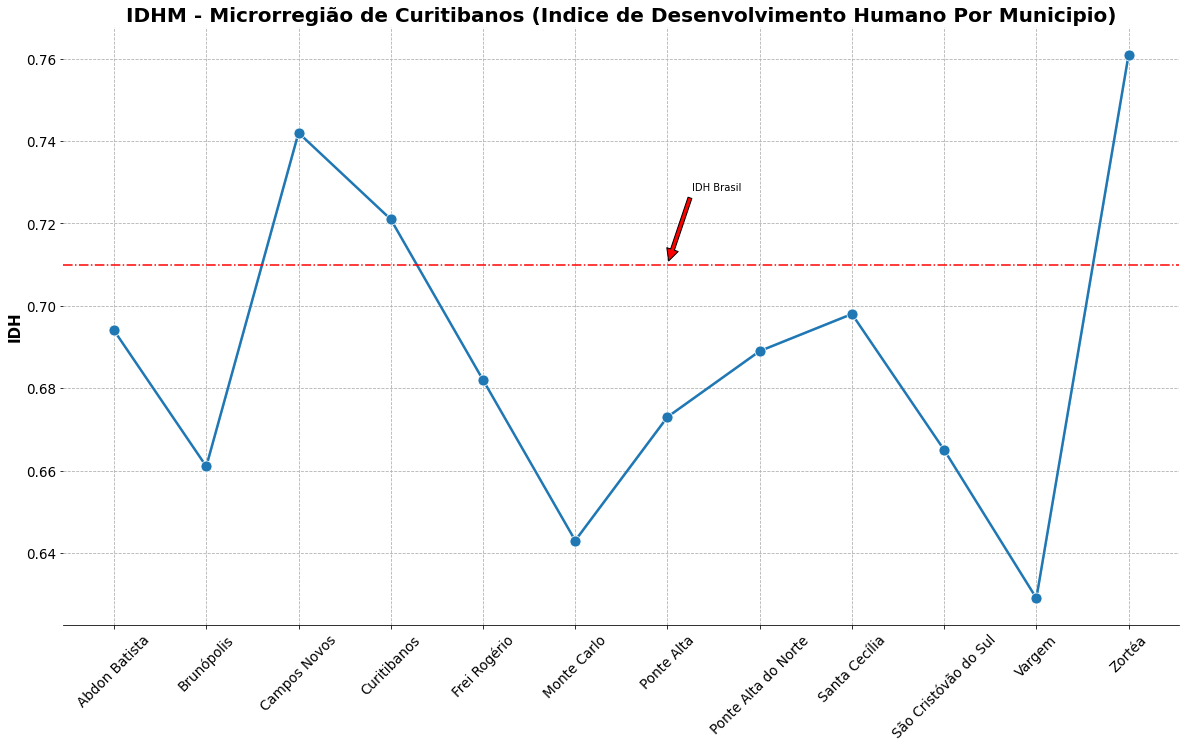

In [29]:
fig, ax = plt.subplots(figsize=(20,11))
for axis in ['top', 'right', 'left']:
   ax.spines[axis].set_color(None)
sns.lineplot(data=dados_completos_ENEM_IBGE,x='NO_MUNICIPIO_RESIDENCIA',y='IDHM',marker='o',markersize=11,
             lw=2.5)
ax.annotate('IDH Brasil',xy=(6,0.710),xycoords='data',xytext=(6.8,0.73),arrowprops=dict(facecolor='red', shrink=0.05),
              horizontalalignment='right', verticalalignment='top')
plt.grid(True,ls='--')
plt.axhline(0.710,ls='-.',color='r')
plt.title('IDHM - Microrregião de Curitibanos (Indice de Desenvolvimento Humano Por Municipio)',
          fontdict={'fontsize':20,'fontweight':'semibold'})
plt.xticks(rotation=45)
plt.xlabel(None)
plt.ylabel('IDH',fontdict={'fontsize':15,'fontweight':'semibold'})
plt.tick_params(labelsize=13.5)
plt.show()

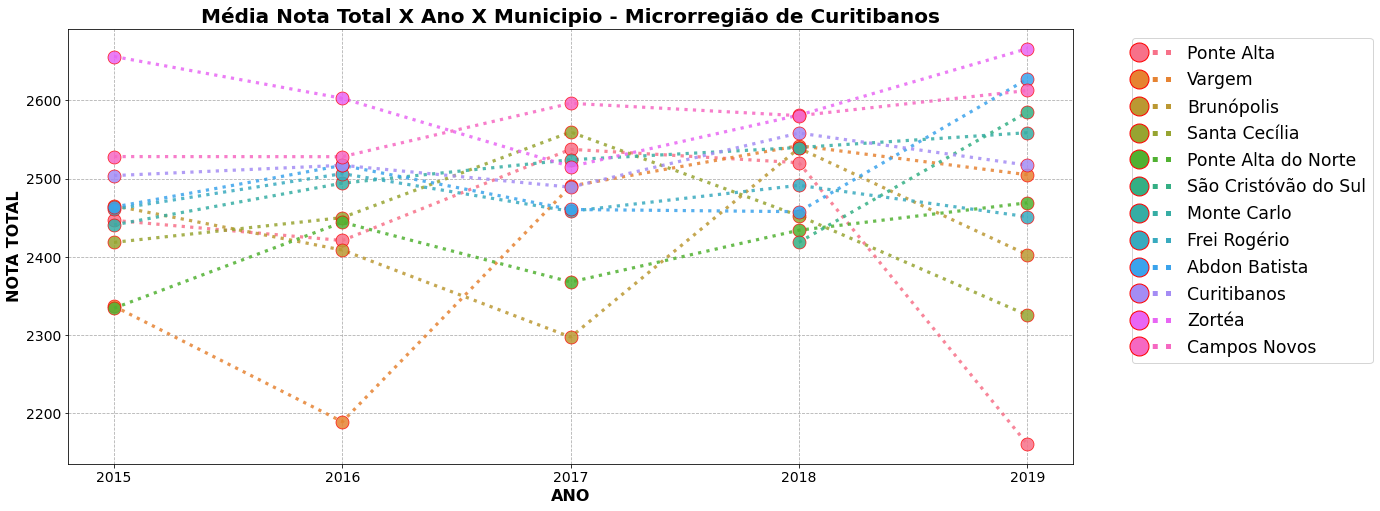

In [30]:
fig, ax = plt.subplots(figsize=(18,8))
dados_filtrados_nota_total = dados_completos_ENEM_IBGE.filter(items=['NO_MUNICIPIO_RESIDENCIA','NU_ANO','NU_NOTA_TOTAL'])\
                                .groupby(['NO_MUNICIPIO_RESIDENCIA','NU_ANO']).mean().sort_values(by='NU_NOTA_TOTAL')
sns.lineplot(data=dados_filtrados_nota_total,x='NU_ANO',y='NU_NOTA_TOTAL',hue='NO_MUNICIPIO_RESIDENCIA',lw=3.20,marker='o',
             markersize=13,ls=':',markeredgecolor=('Red'),alpha=0.85)
plt.xlabel('ANO',fontdict=dict(fontsize=16,fontweight='semibold'))
plt.ylabel('NOTA TOTAL',fontdict=dict(fontsize=16,fontweight='semibold'))
plt.tick_params(labelsize=14)
plt.xticks([2015,2016,2017,2018,2019])
plt.title('Média Nota Total X Ano X Municipio - Microrregião de Curitibanos',fontdict=dict(fontsize=20,fontweight='semibold'))
leg = plt.legend(bbox_to_anchor=(1.05,1),fontsize='xx-large')
for legenda in leg.legendHandles:
    legenda.set_linewidth(5.0)
    legenda.set_markeredgecolor('Red')
    legenda.set_markevery(every=2)
    legenda.set_markersize(19)
    legenda.set_marker('o')
    legenda.set_linestyle(':')
plt.grid(True,ls='--')
plt.show()